In [47]:
import finesse
finesse.configure(plotting=True)
sm=finesse.Model()
sm.parse("""
l laser1 P=1 
s s0 laser1.p1 pr.p1 L=0
#mod Pm midx=1 f=9M order=1
#s s1 Pm.p2 pr.p1 L=0
m pr R=0.9 T=0.1    #Power recycling mirror
s PRC pr.p2 bs1.p1 L=1
bs bs1 R=0.5 T=0.5  #50-50 Beam Splitter
s Lx bs1.p3 ETMx.p1 L=1   #Impedance matched(R_pr=sin^2(k(lx-ly)))
m ETMx R=1 T=0 phi=90          #Setting the asymmetric port dark

s Ly bs1.p2 ETMy.p1 L=1
m ETMy R=1 T=0
#pd Circulated_p pr.p2.o       #Power circulated in the Power recycling cavity
ad Circulated_f pr.p2.o f=0    #CField circulated in the PRC
#ad Circulated_s1 bs1.p1.i f=9M  #SField circulated in the PRC
#ad Circulated_s2 bs1.p1.i f=-9M   #SField circulated in the PRC
xaxis(ETMy.phi,lin,0,180,100)
""")

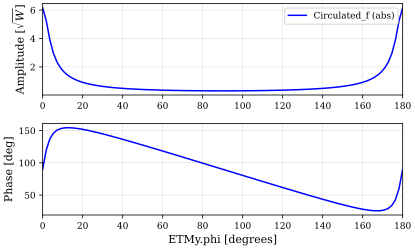

{finesse.detectors.amplitude_detector.AmplitudeDetector: <Figure size 576x355.968 with 2 Axes>,
 'Circulated_f': <Figure size 576x355.968 with 2 Axes>}

In [48]:
out=sm.run()
out.plot()
#circulated=[]
# for i in range(10001):
#     circulated.append(out["Circulated"][i])

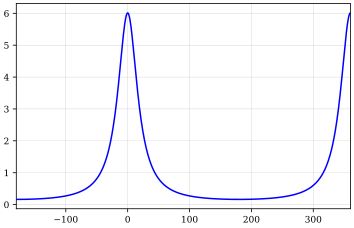

In [54]:
import matplotlib.pyplot as plt
import numpy as np
k=2*np.pi/1064E-9
l_p=1
l_x=1
l_y=1
T=0.1
R=0.9
phi=np.linspace(-180,360,1000)
E_2=1j*np.sqrt(T)/(1-1j*np.sqrt(R)*np.sin(np.pi/2-np.pi*phi/180)*np.exp(-1j*2*k))
phs_2=180*np.angle(E_2)/np.pi
amp_2=abs(E_2)
#phs_2=180*np.arctan((np.sqrt(T)+np.sqrt(R)*np.sin(np.pi*phi/180)*np.sin(2*k*l_p)/(np.sqrt(R)*np.sin(np.pi*phi/180)*np.cos(2*k*l_p))))/np.pi
#phs_1=180*np.arctan((np.sqrt(T)+np.sqrt(R)*np.sin(k*(l_x-l_y)+np.pi/2)*np.sin(2*k*l_p+2*np.pi*phi/180))/(np.sqrt(R)*np.sin(k*(l_x-l_y)+np.pi/2)*np.cos(2*k*l_p+2*np.pi*phi/180)))/np.pi
# P_c1=T/(1+R*(np.sin(k*(l_x-1)-np.pi*(90-phi)/180))**2+(np.sqrt(R))*2*(np.sin(k*(l_x-1)-np.pi*(90-phi)/180))*np.sin(2*k*l_p))
# P_c2=T/(1+2*np.sqrt(R)*np.sin(2*k*l_p+2*np.pi*phi/180)+R)
plt.plot(phi,amp_2)
#plt.ylim(-180,180)

In [16]:
# b=[]
# for i in range(10001):
#     if abs(circulated[i]-0.5*max(circulated))<0.15:#approximating the FWHM by finding two points close to the half maximum
#         b.append(circulated[i])
# print(b)

In [63]:
# print("FWHM_pr={}Hz".format(1E4*(circulated.index(b[1])-circulated.index(b[0]))))
# print("FSR_pr={}Hz".format(1.5E8))
# print("FINESSE_pr={}".format(1.5E8/(1E4*(circulated.index(b[1])-circulated.index(b[0])))))